PROBLEM STATEMENT: Using Wine dataset "https://archive.ics.uci.edu/ml/datasets/wine" from UCI repository, the aim is to predict the class categories of the thirteen chemical constituents of wine determined by the three cultivators of Italy.

STUDENT NO: N10628584
NAME: SAUMYA KAIM

In [1]:
#Initialising libraries for further use

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api
import statsmodels.formula.api as sm 
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn import discriminant_analysis
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

These chemical constituents are continous values. 

In [3]:
# reading csv files
wine_data =  pd.read_csv('wine.data', header = None)
print(wine_data)
 

     0      1     2     3     4    5     6     7     8     9          10  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.640000   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.380000   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.680000   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.800000   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.320000   
5     1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.750000   
6     1  14.39  1.87  2.45  14.6   96  2.50  2.52  0.30  1.98   5.250000   
7     1  14.06  2.15  2.61  17.6  121  2.60  2.51  0.31  1.25   5.050000   
8     1  14.83  1.64  2.17  14.0   97  2.80  2.98  0.29  1.98   5.200000   
9     1  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85   7.220000   
10    1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38   5.750000   
11    1  14.12  1.48  2.32  16.8   95  2.20  2.43  0.26  1.57   5.000000   
12    1  13.

In [4]:
#Given the columns names are just numbers, we can give them their respective labels mentioned on 
#https://archive.ics.uci.edu/ml/datasets/wine data repository 

wine_data.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 
                'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

Out of the 178 samples, and 14 attributes, none attributes has any missing data.

In [5]:
print(wine_data.shape)
print(wine_data.isna().sum())

(178, 14)
Label                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [6]:
wine_data['Label'].value_counts()

2    71
1    59
3    48
Name: Label, dtype: int64

From the below plot, the label class appears to be slighlty imbalanced 

<AxesSubplot:>

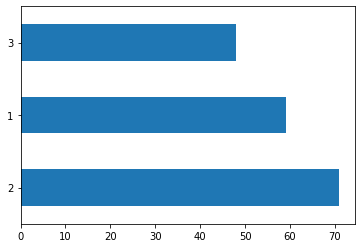

In [7]:
wine_data['Label'].value_counts()[:3].plot(kind='barh')

In [8]:
wine_data.columns

Index(['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [9]:
Labels = {1:'one', 2:'two', 3:'three'}

In [10]:
wine_data['Labels']= wine_data['Label'].map(Labels)

Text(0, 0.5, 'Malic Acid')

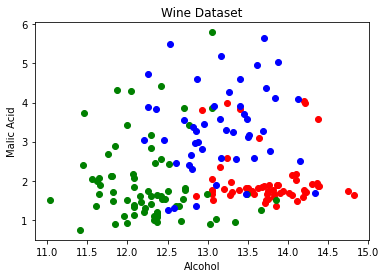

In [12]:
# create color dictionary
colors = {'one':'r', 'two':'g', 'three':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(wine_data['Alcohol'])):
    ax.scatter(wine_data['Alcohol'][i], wine_data['Malic Acid'][i],color=colors[wine_data['Labels'][i]])

# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')

Above plot, shows that the level of Alcohol from 13 to 14 are mostly part of class one, as the level lowers down i.e. within 11.5 to 12.5 we can see the classes scattered for class 2. Levels of Malic acid which mostly can be seen around from 1 to 3.5, there are  are a part of class 1 and 2. 

Text(0, 0.5, 'Alcalinity of ash ')

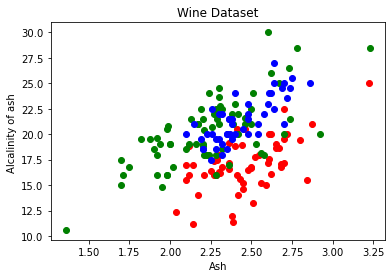

In [13]:
# create color dictionary
colors = {'one':'r', 'two':'g', 'three':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(wine_data['Ash'])):
    ax.scatter(wine_data['Ash'][i], wine_data['Alcalinity of ash '][i],color=colors[wine_data['Labels'][i]])

# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('Ash')
ax.set_ylabel('Alcalinity of ash ')

Text(0, 0.5, 'Total phenols')

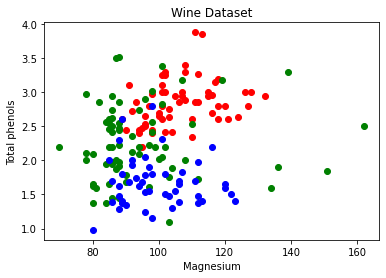

In [14]:
# create color dictionary
colors = {'one':'r', 'two':'g', 'three':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(wine_data['Magnesium'])):
    ax.scatter(wine_data['Magnesium'][i], wine_data['Total phenols'][i],color=colors[wine_data['Labels'][i]])

# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('Magnesium')
ax.set_ylabel('Total phenols')

Text(0, 0.5, 'Nonflavanoid phenols')

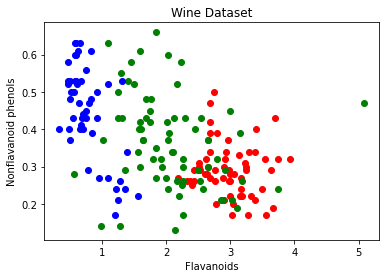

In [15]:
# create color dictionary
colors = {'one':'r', 'two':'g', 'three':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(wine_data['Flavanoids'])):
    ax.scatter(wine_data['Flavanoids'][i], wine_data['Nonflavanoid phenols'][i],color=colors[wine_data['Labels'][i]])

# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('Flavanoids')
ax.set_ylabel('Nonflavanoid phenols')

Text(0, 0.5, 'Color intensity')

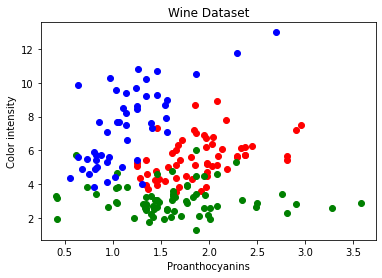

In [16]:
# create color dictionary
colors = {'one':'r', 'two':'g', 'three':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(wine_data['Proanthocyanins'])):
    ax.scatter(wine_data['Proanthocyanins'][i], wine_data['Color intensity'][i],color=colors[wine_data['Labels'][i]])

# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('Proanthocyanins')
ax.set_ylabel('Color intensity')

Text(0, 0.5, 'OD280/OD315 of diluted wines')

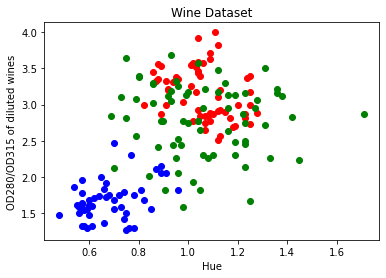

In [17]:
# create color dictionary
colors = {'one':'r', 'two':'g', 'three':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(wine_data['Hue'])):
    ax.scatter(wine_data['Hue'][i], wine_data['OD280/OD315 of diluted wines'][i],color=colors[wine_data['Labels'][i]])

# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('Hue')
ax.set_ylabel('OD280/OD315 of diluted wines')

Text(0, 0.5, 'OD280/OD315 of diluted wines')

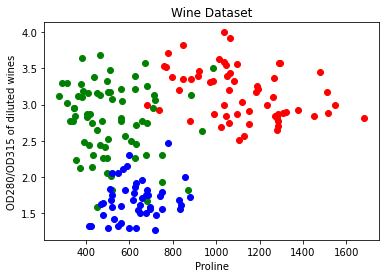

In [18]:
# create color dictionary
colors = {'one':'r', 'two':'g', 'three':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(wine_data['Proline'])):
    ax.scatter(wine_data['Proline'][i], wine_data['OD280/OD315 of diluted wines'][i],color=colors[wine_data['Labels'][i]])

# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('Proline')
ax.set_ylabel('OD280/OD315 of diluted wines')

In [11]:
wine_data.drop('Labels', axis = 1, inplace = True)

In [12]:
wine_data.head()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
#dividng the predictors and target variable for training data set 
predictors = wine_data.iloc[:, 1:].to_numpy()
target = wine_data.iloc[:, 0]
print(predictors)
print(target)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     2
60     2
61     2
62     2
63     2
64     2
65     

In [14]:
target = np.array(target) - 1   #some classifiers of sklearn read class labels from 0, hence the numeric labels  

Text(0.5, 1.0, 'Raw training data')

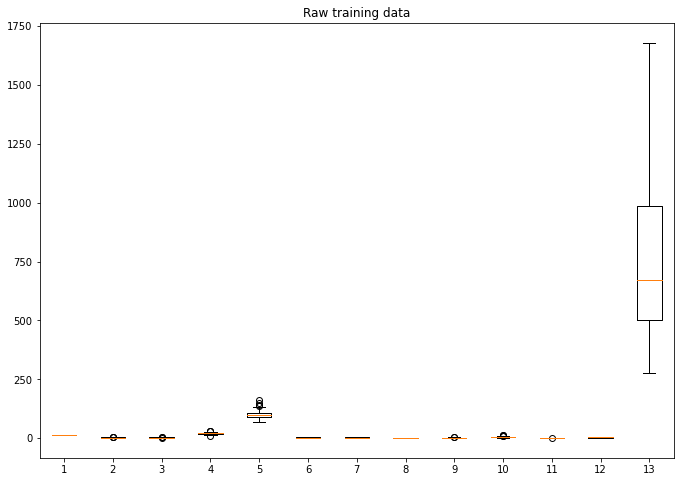

In [15]:
# plot box plot for the data 

fig = plt.figure(figsize = [25,8])
ax = fig.add_subplot(1,2,1)
ax.boxplot(predictors)
ax.set_title('Raw training data')

We can see that the chemical constituents are on different scales here, so we have to bring them to equal standard scales for which normalisation has to be done. It is computed by calculating the features's mean and standard deviation. Further, M is subtracted from each feature which is divided further by its standard deviation. This normalisation causes the data to be centered around the origin which can be shown through the below box plot.  

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


Text(0.5, 1.0, 'Standardised training data')

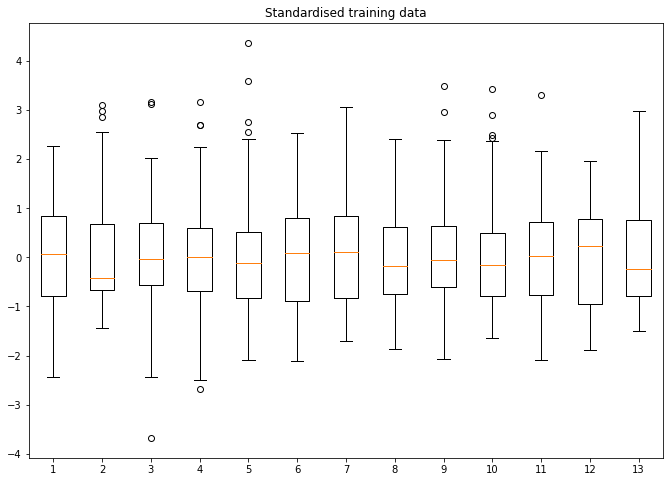

In [16]:
#standardise data and plotting for training set 

mu = np.mean(predictors, 0)
sigma = np.std(predictors, 0)
WineX = (predictors - mu)/sigma
print(WineX)

fig = plt.figure(figsize = [25,8])
ax = fig.add_subplot(1,2,1)
ax.boxplot(WineX)
ax.set_title('Standardised training data')

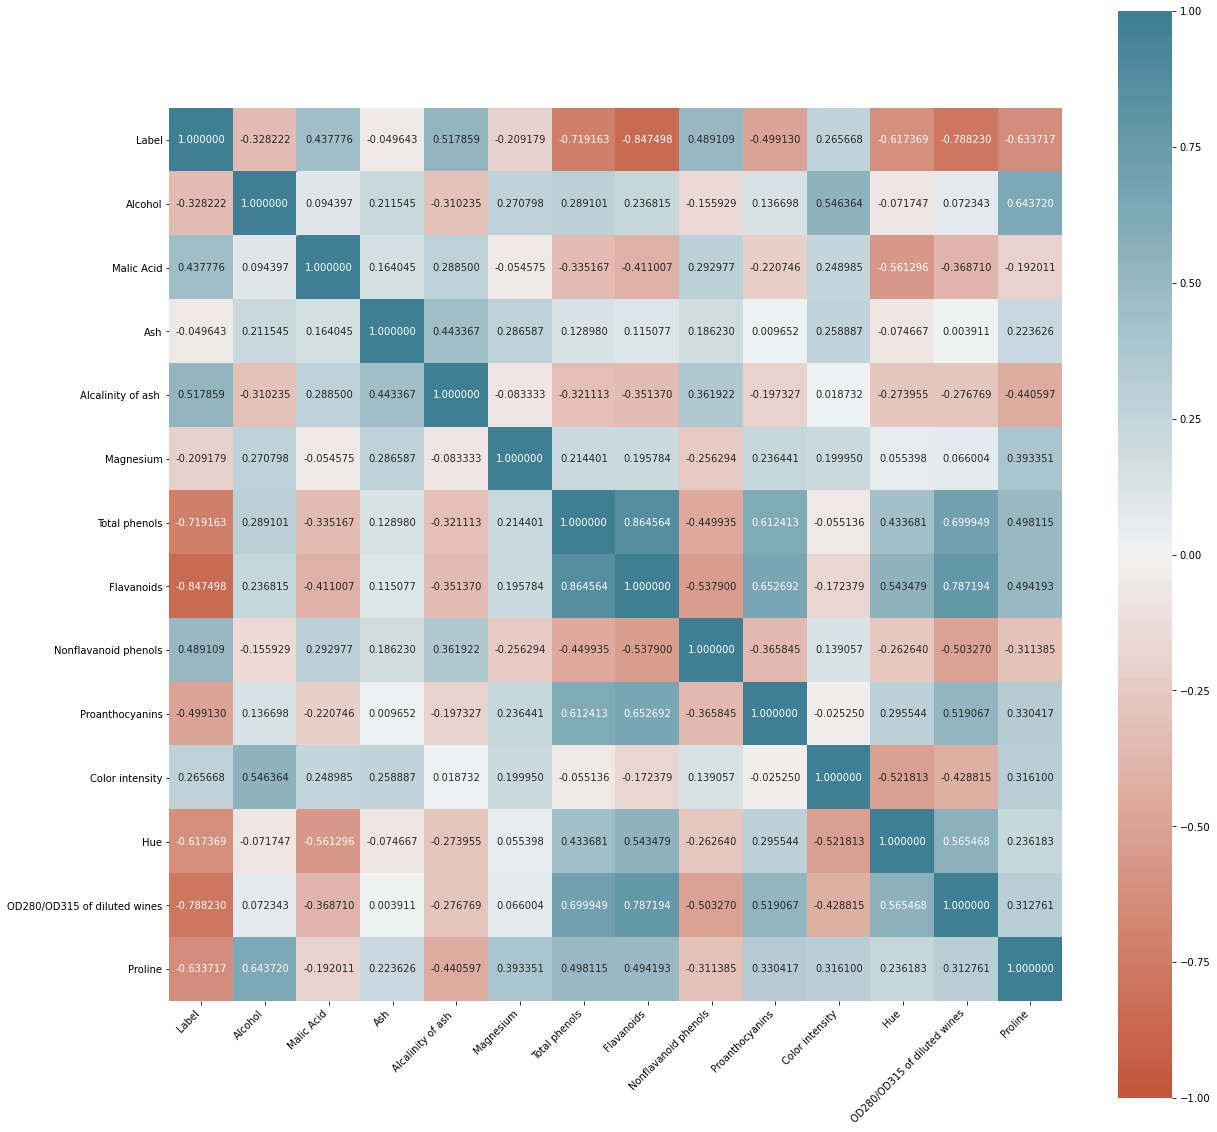

In [17]:
fig = plt.figure(figsize=(20,20))
corr = wine_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, fmt="f",
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the above correlation plot, more darker greens and reds which suggests that the chemical constituents are correlated with each other. Rather than removing them, we will apply unsupervised learning method; PCA, to reconstruct these dimensions into principal components. These principal components, reconstructs or transforms the features into a n * n array giving us the most information with a high variance. Using these transformed features, to classify constituents in their respective classes. We will also see the use of transforming features into eigen vectors. We will see how PCA uses high variance transfromation for separation of classes, whereas LDA uses these dimensions to maximise separation between the classes. Here, our approch will see which transformation of componenets would results in best separation of classes, and use those trasnformed features for classying our cultivators of wine in their respective chemical consitutents. 

In [18]:
from sklearn.decomposition import PCA

pca = decomposition.PCA()
pca.fit(WineX)

print(pca.components_)
print(pca.explained_variance_)     
print(pca.explained_variance_ratio_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [-0.21353865 -0.53681385 -0.15447466  0.10082451 -0.03814394  0.0841223
   0.01892002  0.25859401  0.53379539  0.41864414 -0.10598274 -0.26585107
  -0.11972557]
 [-0.05639636  0.420523

In [19]:
print(np.shape(pca.components_))

(13, 13)


Learn thirteen new dimensions which are a combination of existing 13 dimensions already involved in the dataset.

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


Text(0.5, 0, 'Number of Components')

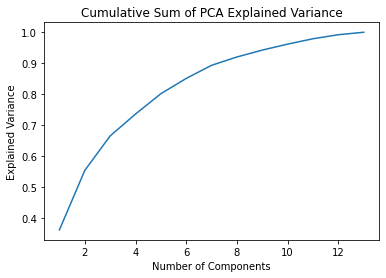

In [20]:
transformed = pca.transform(WineX)
print(pca.explained_variance_ratio_)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_, axis=0)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1, 14), cumulative_sum)
ax.set_title('Cumulative Sum of PCA Explained Variance')
ax.set_ylabel('Explained Variance')
ax.set_xlabel('Number of Components')

In [21]:
wine_df = pd.DataFrame(transformed, columns = ['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13'])
wine_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [22]:
LABEL = []

for i in target:
    if i == 0:
        LABEL.append(0)
    elif i == 1:
        LABEL.append(1)
    else:
        LABEL.append(2)
        
Winelabel = pd.DataFrame(LABEL, columns=['Winelabel'])
    

In [23]:
wine_features = pd.concat([wine_df, Winelabel], axis = 1)
wine_features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Winelabel
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,0


In [24]:
explained_variance = pca.explained_variance_ratio_

In [33]:
#!pip install plotly

In [25]:
import plotly.express as px

In [26]:
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [27]:
cumulative_sum = np.cumsum(np.round(explained_variance, decimals = 3))

In [28]:
pc_df = pd.DataFrame(['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13'],
                     columns=['PC'])
explained_varaince_df = pd.DataFrame(explained_variance, columns = ['Explained Variance'])
cumulative_sum_df = pd.DataFrame(cumulative_sum, columns = ['Cumulative Sum'])

In [29]:
df_wine = pd.concat([pc_df, explained_varaince_df, cumulative_sum_df ], axis = 1)
df_wine

,PC,Explained Variance,Cumulative Sum
0,PC1,0.361988,0.362
1,PC2,0.192075,0.554
2,PC3,0.111236,0.665
3,PC4,0.070690,0.736
4,PC5,0.065633,0.802
5,PC6,0.049358,0.851
6,PC7,0.042387,0.893
7,PC8,0.026807,0.920
8,PC9,0.022222,0.942
9,PC10,0.019300,0.961


As we can see above, the bar represent the variance from carrying the most high variance to the lowest, the cumulative varaince is same as explained variance of PC1, but further the cumulative varaince for PC2, will be a combination of PC1 variance and PC2 variance. 

In [43]:
transformed

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

PCA distorts if there is no standardisation for the data. 

Text(0.5, 1.0, 'First two PCA Components')

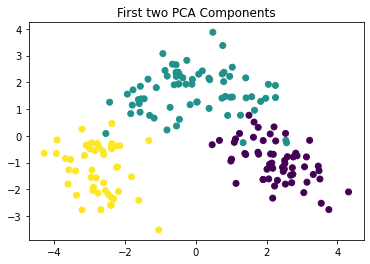

In [106]:
figs = plt.figure()
axs = figs.add_subplot(1, 1, 1)
axs.scatter(transformed[:,0], transformed[:,1], c=target);
axs.set_title('First two PCA Components')

Text(0.5, 1.0, 'First three PCA Components')

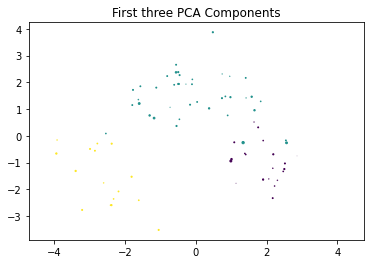

In [111]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed[:,0], transformed[:,1], transformed[:,2], c=target);
ax.set_title('First three PCA Components')

Here, we see standardisating the data helped separating the three classes. 

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(transformed[:,0:2], target, test_size = 0.3, random_state = 4)

In [117]:
print( X_test.shape, Y_test.shape)
print(X_train.shape, Y_train.shape)

(54, 2) (54,)
(124, 2) (124,)


In [43]:
from sklearn import linear_model

In [138]:
model_log = linear_model.LogisticRegression()
model_log.fit(X_train, Y_train)

LogisticRegression()

In [139]:
model_log.predict(X_test)

array([2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 0])

In [140]:
model_log.score(X_test, Y_test)

0.9814814814814815

In [141]:
predicted_output = model_log.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_output)
cm

array([[18,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 16]])

Text(24.0, 0.5, 'Actual value')

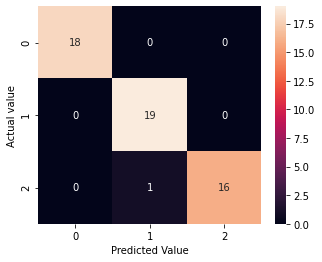

In [143]:
import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')

In [144]:
print(classification_report(Y_test, predicted_output))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [55]:
print(classification_report(Y_test, predicted_output_dt))

From the above output, for class 0, 18 times the model predicted correct actual value. For class 1, the model 19 times the correct actual value, but there was 1 time the model predicted the value of a chemical constituent as class 2, however, it was class 1. For class 2, the model predicted the correct actual value 16 times. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      1.00      0.95        19
           2       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Random Forest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_wine = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
rf_wine.fit(X_train, Y_train)  #training the model
rf_wine.score(X_test, Y_test)  #making predcition 

0.9629629629629629

In [57]:
predicted_output_rf = rf_wine.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test, predicted_output)
cm_rf

array([[18,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 16]])

Text(24.0, 0.5, 'Actual value')

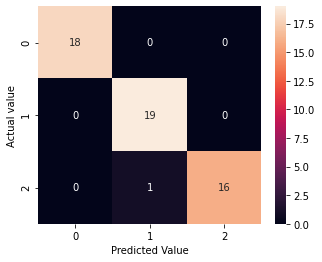

In [59]:
import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sns.heatmap(cm_rf, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')

In [60]:
print(classification_report(Y_test, predicted_output_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      1.00      0.95        19
           2       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_wine = GradientBoostingClassifier()
GBC_wine.fit(X_train, Y_train)  #training the model
GBC_wine.score(X_test, Y_test)  #making prediction

0.9629629629629629

Tune the GBC classifers to improve the accuracy of the classifier 

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_wine = GradientBoostingClassifier(n_estimators = 50)
GBC_wine.fit(X_train, Y_train)  #training the model
GBC_wine.score(X_test, Y_test)   #making prediction

0.9629629629629629

In [147]:
predicted_output_GBC = GBC_wine.predict(X_test)

In [148]:
from sklearn.metrics import confusion_matrix
cm_GBC = confusion_matrix(Y_test, predicted_output_GBC)
cm_GBC

array([[18,  0,  0],
       [ 0, 19,  0],
       [ 0,  2, 15]])

Text(24.0, 0.5, 'Actual value')

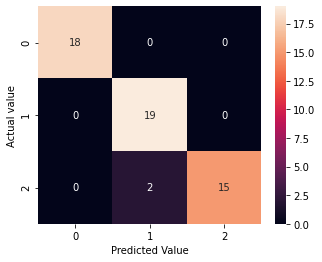

In [149]:
import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sns.heatmap(cm_GBC, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')

In [151]:
print(classification_report(Y_test, predicted_output_GBC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      1.00      0.95        19
           2       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Naive Bayes classifier

In [92]:
from sklearn.naive_bayes import GaussianNB
nb_wine = GaussianNB()
nb_wine.fit(X_train, Y_train)  #training the model
nb_wine.score(X_test, Y_test)  #making prediction

1.0

In [93]:
predicted_output_nb = nb_wine.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(Y_test, predicted_output_nb)
cm_nb

array([[18,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 17]])

Text(24.0, 0.5, 'Actual value')

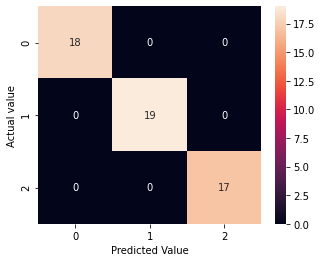

In [95]:
import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sns.heatmap(cm_nb, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')

In [96]:
print(classification_report(Y_test, predicted_output_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



KNN classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
cknn_wine = KNeighborsClassifier(n_neighbors=2)
cknn_wine.fit(X_train, Y_train)  #training the model
cknn_wine.score(X_test, Y_test)  #making prediction

0.9814814814814815

In [72]:
predicted_output_cknn = cknn_wine.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm_cknn = confusion_matrix(Y_test, predicted_output_cknn)
cm_cknn

array([[18,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 16]])

Text(24.0, 0.5, 'Actual value')

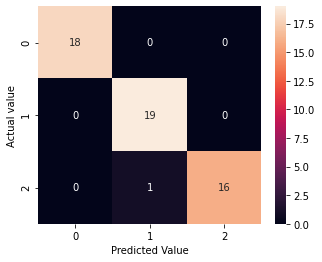

In [74]:
import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sns.heatmap(cm_cknn, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')

In [75]:
print(classification_report(Y_test, predicted_output_cknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



SVM (One vs all)

In [127]:
svm_rbf_wine = SVC(C = 1, kernel = 'rbf', degree = 3, gamma= 'auto', class_weight = 'balanced', probability = True)  
svm_rbf_wine.fit(X_train, Y_train)
svm_rbf_wine.score(X_test, Y_test)

0.9814814814814815

In [128]:
predicted_output_svm = svm_rbf_wine.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(Y_test, predicted_output_svm)
cm_svm

array([[18,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 16]])

Text(24.0, 0.5, 'Actual value')

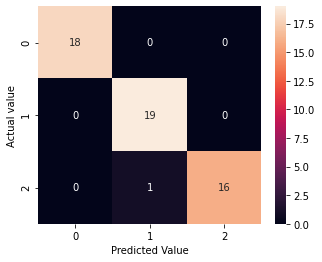

In [130]:
import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sns.heatmap(cm_svm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')

In [131]:
print(classification_report(Y_test, predicted_output_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [135]:
print('Logistic regression accuracy: %.2f%%' % (score1*100))
print('Decision Tree accuracy: %.2f%%' % (score2*100))
print('Random Forest accuracy: %.2f%%' % (score3*100))
print('Gradient Boost accuracy: %.2f%%' % (score4*100))
print('Naive Bayes accuracy: %.2f%%' % (score5*100))
print('K NearestN Neighbour accuracy: %.2f%%' % (score6*100))
print('Support Vector Machine accuracy: %.2f%%' % (score7*100))

Logistic regression accuracy: 98.15%
Decision Tree accuracy: 96.30%
Random Forest accuracy: 96.30%
Gradient Boost accuracy: 96.30%
Naive Bayes accuracy: 100.00%
K NearestN Neighbour accuracy: 98.15%
Support Vector Machine accuracy: 98.15%


In [101]:
!pip install mlxtend  

Let's assume a significance threshold of alpha = 0.05 for rejecting the null hypothesis that both algorithms perform equally well on the dataset and conduct the 5*2cv t test:

In [155]:
x = transformed[:, 0:2]

In [156]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=nb_wine,
                          estimator2=svm_rbf_wine,
                          X=x, y=target,
                          random_seed=1)

print('t statistic: %.5f' % t)
print('p value: %.5f' % p)

t statistic: 0.74536
p value: 0.48959


In [158]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=cknn_wine,
                          estimator2=nb_wine,
                          X=x, y=target,
                          random_seed=1)

print('t statistic: %.5f' % t)
print('p value: %.5f' % p)

t statistic: -1.29099
p value: 0.25317


In [159]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=rf_wine,
                          estimator2=nb_wine,
                          X=x, y=target,
                          random_seed=1)

print('t statistic: %.5f' % t)
print('p value: %.5f' % p)

t statistic: -2.08263
p value: 0.09175


Since, p is greater than alpha, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.This leads us to fail to reject the null hypothesis, suggesting that any observed difference between the algorithms is probably not real. Hecne, we could easily choose either support vector machine or K nearest neighbour for our wine dataset, and both clssifiers would perform equally on average. 